<a href="https://colab.research.google.com/github/Savville/machine_learning_in_structures/blob/main/3D_%2B_BoQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Security Guard House 3D Model...
Building Specifications:
Length: 3.01 m
Width: 2.1 m
Wall Height: 2.7 m
Roof Peak Height: 3.1 m
Wall Thickness: 0.1 m
Slab Thickness: 0.5 m
Door: 0.9m wide x 2.0m high
Windows: 0.66m wide x 0.9m high (sides), 0.65m wide x 0.9m high (front)
Steps: 2 steps, 0.3m depth, 0.15m height each


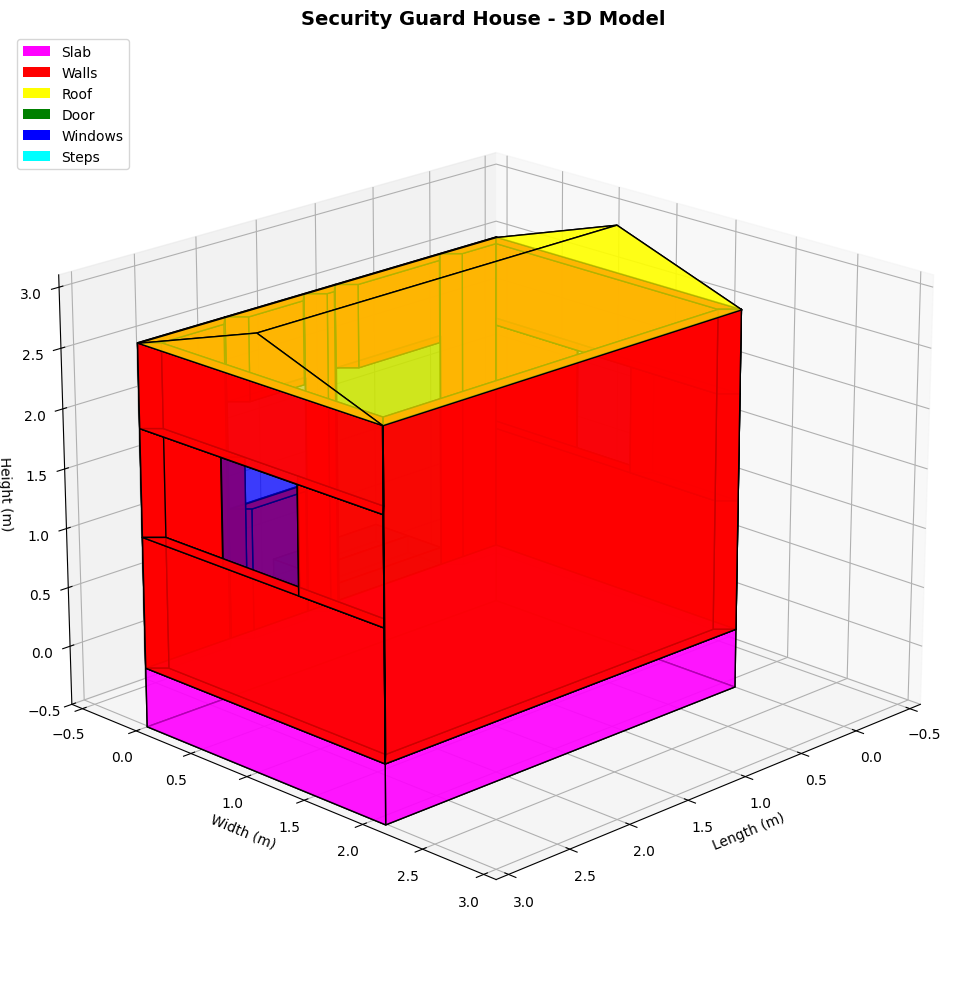

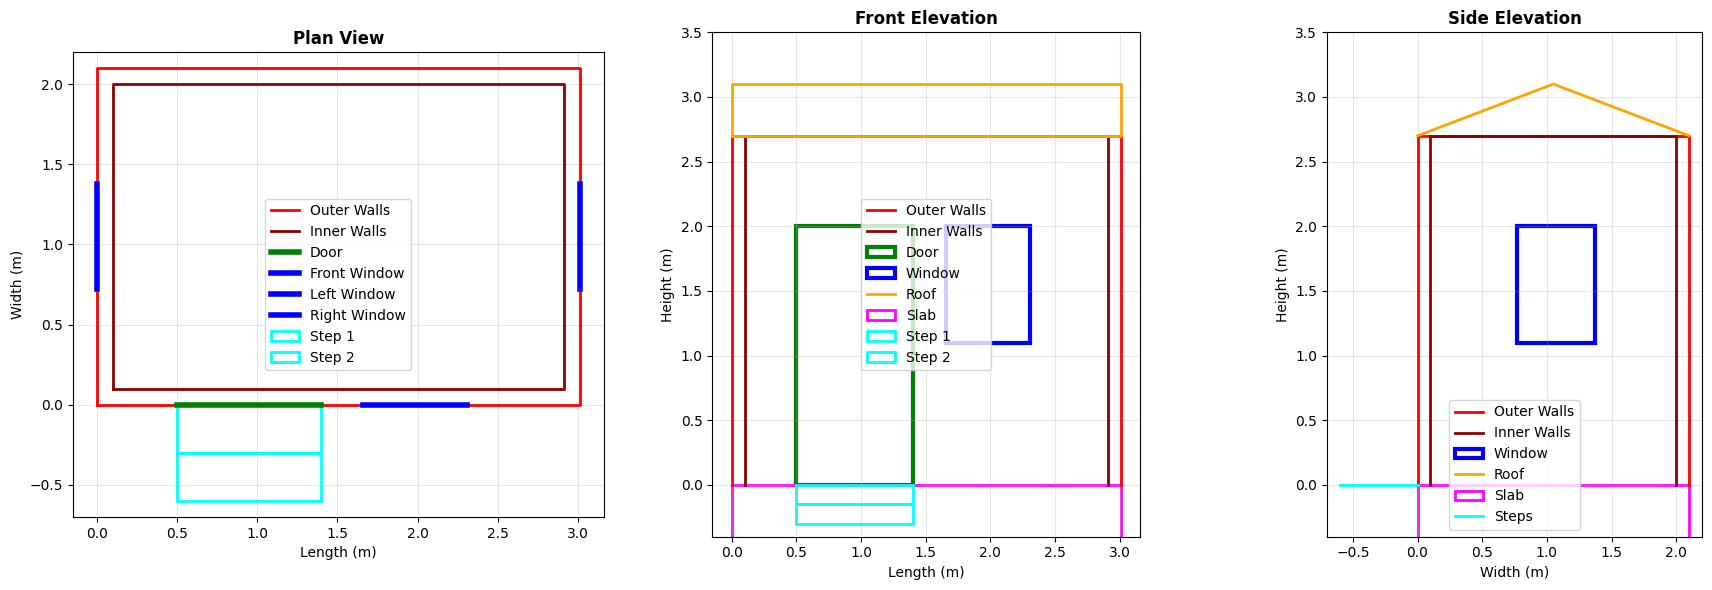


AutoCAD Command Sequence:

LAYER
M WALLS C 1
M DOOR C 3
M WINDOWS C 5
M ROOF C 2
M SLAB C 8
M STEPS C 14 # Cyan color for steps

LAYER
S SLAB
# Bottom face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,2.1,-0.5 0,2.1,-0.5 C
# Top face
LINE 0,0,0 3.01,0,0 3.01,2.1,0 0,2.1,0 C
# Front face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,0,0 0,0,0 C
# Right face
LINE 3.01,0,-0.5 3.01,2.1,-0.5 3.01,2.1,0 3.01,0,0 C
# Back face
LINE 3.01,2.1,-0.5 0,2.1,-0.5 0,2.1,0 3.01,2.1,0 C
# Left face
LINE 0,2.1,-0.5 0,0,-0.5 0,0,0 0,2.1,0 C


LAYER
S WALLS
# Outer boundaries
LINE 0,0,0 0,0,2.7
LINE 0,2.1,0 0,2.1,2.7
LINE 3.01,0,0 3.01,0,2.7
LINE 3.01,2.1,0 3.01,2.1,2.7
LINE 0,0,2.7 3.01,0,2.7
LINE 0,2.1,2.7 3.01,2.1,2.7
LINE 0,0,2.7 0,2.1,2.7
LINE 3.01,0,2.7 3.01,2.1,2.7

# Inner boundaries
LINE 0.1,0.1,0 0.1,2.0,0
LINE 0.1,0.1,2.7 0.1,2.0,2.7
LINE 2.91,0.1,0 2.91,2.0,0
LINE 2.91,0.1,2.7 2.91,2.0,2.7
LINE 0.1,0.1,0 2.91,0.1,0
LINE 0.1,2.0,0 2.91,2.0,0
LINE 0.1,0.1,2.7 2.91,0.1,2.7
LINE 0.1,2.0,2.7 2.91,2.0,2.7

# Connecting lines f

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def create_guard_house():
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Define colors for different components (matching AutoCAD layer colors)
    colors = {
        'walls': 'red',      # Color 1
        'roof': 'yellow',    # Color 2
        'door': 'green',     # Color 3
        'windows': 'blue',   # Color 5
        'slab': 'magenta',   # Color 8
        'steps': 'cyan' # Color for steps
    }

    # Building dimensions
    length = 3.01  # X direction
    width = 2.1    # Y direction
    wall_height = 2.7
    roof_peak_height = 3.1
    slab_thickness = 0.5 # Updated slab thickness
    wall_thickness = 0.1 # Define wall thickness

    # SLAB (foundation) - Adjusted for thicker slab
    slab_vertices = [
        [0, 0, -slab_thickness], [length, 0, -slab_thickness], [length, width, -slab_thickness], [0, width, -slab_thickness],
        [0, 0, 0], [length, 0, 0], [length, width, 0], [0, width, 0]
    ]
    slab_faces = [
        [slab_vertices[0], slab_vertices[1], slab_vertices[2], slab_vertices[3]], # Bottom
        [slab_vertices[4], slab_vertices[5], slab_vertices[6], slab_vertices[7]], # Top
        [slab_vertices[0], slab_vertices[1], slab_vertices[5], slab_vertices[4]], # Front
        [slab_vertices[1], slab_vertices[2], slab_vertices[6], slab_vertices[5]], # Right
        [slab_vertices[2], slab_vertices[3], slab_vertices[7], slab_vertices[6]], # Back
        [slab_vertices[3], slab_vertices[0], slab_vertices[4], slab_vertices[7]]  # Left
    ]
    ax.add_collection3d(Poly3DCollection(slab_faces, facecolors=colors['slab'], alpha=0.7, edgecolors='black'))

    # WALLS (Single entity with thickness)
    # Define vertices for the entire wall structure considering openings
    wall_vertices = []
    wall_faces = []

    # Front wall (with door and window openings)
    # Outer front wall
    outer_front = np.array([[0, 0, 0], [length, 0, 0], [length, 0, wall_height], [0, 0, wall_height]])
    # Inner front wall
    inner_front = np.array([[wall_thickness, wall_thickness, 0], [length - wall_thickness, wall_thickness, 0],
                            [length - wall_thickness, wall_thickness, wall_height], [wall_thickness, wall_thickness, wall_height]])

    # Back wall (solid)
    # Outer back wall
    outer_back = np.array([[0, width, 0], [length, width, 0], [length, width, wall_height], [0, width, wall_height]])
    # Inner back wall
    inner_back = np.array([[wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 0],
                           [length - wall_thickness, width - wall_thickness, wall_height], [wall_thickness, width - wall_thickness, wall_height]])

    # Left wall (with window opening)
    # Outer left wall
    outer_left = np.array([[0, 0, 0], [0, width, 0], [0, width, wall_height], [0, 0, wall_height]])
    # Inner left wall
    inner_left = np.array([[wall_thickness, wall_thickness, 0], [wall_thickness, width - wall_thickness, 0],
                           [wall_thickness, width - wall_thickness, wall_height], [wall_thickness, wall_thickness, wall_height]])

    # Right wall (with window opening)
    # Outer right wall
    outer_right = np.array([[length, 0, 0], [length, width, 0], [length, width, wall_height], [length, 0, wall_height]])
    # Inner right wall
    inner_right = np.array([[length - wall_thickness, wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 0],
                            [length - wall_thickness, width - wall_thickness, wall_height], [length - wall_thickness, wall_thickness, wall_height]])

    # Function to create a rectangular face
    def create_face(v1, v2, v3, v4):
        return [v1, v2, v3, v4]

    # Function to create wall segment with thickness
    def create_thick_wall_segment(outer_points, inner_points, ax, color, alpha=0.8):
        vertices = []
        faces = []

        # Add outer and inner vertices
        vertices.extend(outer_points)
        vertices.extend(inner_points)

        # Create faces for the segment (connecting outer and inner)
        # Front face (outer)
        faces.append(create_face(outer_points[0], outer_points[1], outer_points[2], outer_points[3]))
        # Back face (inner)
        faces.append(create_face(inner_points[0], inner_points[1], inner_points[2], inner_points[3]))
        # Side faces connecting outer and inner
        faces.append(create_face(outer_points[0], outer_points[1], inner_points[1], inner_points[0]))
        faces.append(create_face(outer_points[1], outer_points[2], inner_points[2], inner_points[1]))
        faces.append(create_face(outer_points[2], outer_points[3], inner_points[3], inner_points[2]))
        faces.append(create_face(outer_points[3], outer_points[0], inner_points[0], inner_points[3]))

        ax.add_collection3d(Poly3DCollection(faces, facecolors=color, alpha=alpha, edgecolors='black'))


    # Front wall segments
    # Left of door
    create_thick_wall_segment(
        [[0, 0, 0], [0.5, 0, 0], [0.5, 0, wall_height], [0, 0, wall_height]],
        [[wall_thickness, wall_thickness, 0], [0.5 - wall_thickness, wall_thickness, 0], [0.5 - wall_thickness, wall_thickness, wall_height], [wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Between door and window
    create_thick_wall_segment(
        [[1.4, 0, 0], [1.66, 0, 0], [1.66, 0, wall_height], [1.4, 0, wall_height]],
        [[1.4 + wall_thickness, wall_thickness, 0], [1.66 - wall_thickness, wall_thickness, 0], [1.66 - wall_thickness, wall_thickness, wall_height], [1.4 + wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Right of window
    create_thick_wall_segment(
        [[2.31, 0, 0], [length, 0, 0], [length, 0, wall_height], [2.31, 0, wall_height]],
        [[2.31 + wall_thickness, wall_thickness, 0], [length - wall_thickness, wall_thickness, 0], [length - wall_thickness, wall_thickness, wall_height], [2.31 + wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Above door
    create_thick_wall_segment(
        [[0.5, 0, 2.0], [1.4, 0, 2.0], [1.4, 0, wall_height], [0.5, 0, wall_height]],
        [[0.5 + wall_thickness, wall_thickness, 2.0], [1.4 - wall_thickness, wall_thickness, 2.0], [1.4 - wall_thickness, wall_thickness, wall_height], [0.5 + wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Above window
    create_thick_wall_segment(
        [[1.66, 0, 2.0], [2.31, 0, 2.0], [2.31, 0, wall_height], [1.66, 0, wall_height]],
        [[1.66 + wall_thickness, wall_thickness, 2.0], [2.31 - wall_thickness, wall_thickness, 2.0], [2.31 - wall_thickness, wall_thickness, wall_height], [1.66 + wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Below window
    create_thick_wall_segment(
        [[1.66, 0, 0], [2.31, 0, 0], [2.31, 0, 1.1], [1.66, 0, 1.1]],
        [[1.66 + wall_thickness, wall_thickness, 0], [2.31 - wall_thickness, wall_thickness, 0], [2.31 - wall_thickness, wall_thickness, 1.1], [1.66 + wall_thickness, wall_thickness, 1.1]],
        ax, colors['walls']
    )

    # Back wall (solid)
    create_thick_wall_segment(
        [[0, width, 0], [length, width, 0], [length, width, wall_height], [0, width, wall_height]],
        [[wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, wall_height], [wall_thickness, width - wall_thickness, wall_height]],
        ax, colors['walls']
    )

    # Left wall segments
    # Bottom section (below window)
    create_thick_wall_segment(
        [[0, 0, 0], [0, width, 0], [0, width, 1.1], [0, 0, 1.1]],
        [[wall_thickness, wall_thickness, 0], [wall_thickness, width - wall_thickness, 0], [wall_thickness, width - wall_thickness, 1.1], [wall_thickness, wall_thickness, 1.1]],
        ax, colors['walls']
    )
    # Above window
    create_thick_wall_segment(
        [[0, 0, 2.0], [0, width, 2.0], [0, width, wall_height], [0, 0, wall_height]],
        [[wall_thickness, wall_thickness, 2.0], [wall_thickness, width - wall_thickness, 2.0], [wall_thickness, width - wall_thickness, wall_height], [wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Left of window
    create_thick_wall_segment(
        [[0, 0, 1.1], [0, 0.72, 1.1], [0, 0.72, 2.0], [0, 0, 2.0]],
        [[wall_thickness, wall_thickness, 1.1], [wall_thickness, 0.72 + wall_thickness, 1.1], [wall_thickness, 0.72 + wall_thickness, 2.0], [wall_thickness, wall_thickness, 2.0]],
        ax, colors['walls']
    )
    # Right of window
    create_thick_wall_segment(
        [[0, 1.38, 1.1], [0, width, 1.1], [0, width, 2.0], [0, 1.38, 2.0]],
        [[wall_thickness, 1.38 - wall_thickness, 1.1], [wall_thickness, width - wall_thickness, 1.1], [wall_thickness, width - wall_thickness, 2.0], [wall_thickness, 1.38 - wall_thickness, 2.0]],
        ax, colors['walls']
    )

    # Right wall segments
    # Bottom section (below window)
    create_thick_wall_segment(
        [[length, 0, 0], [length, width, 0], [length, width, 1.1], [length, 0, 1.1]],
        [[length - wall_thickness, wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 0], [length - wall_thickness, width - wall_thickness, 1.1], [length - wall_thickness, wall_thickness, 1.1]],
        ax, colors['walls']
    )
    # Above window
    create_thick_wall_segment(
        [[length, 0, 2.0], [length, width, 2.0], [length, width, wall_height], [length, 0, wall_height]],
        [[length - wall_thickness, wall_thickness, 2.0], [length - wall_thickness, width - wall_thickness, 2.0], [length - wall_thickness, width - wall_thickness, wall_height], [length - wall_thickness, wall_thickness, wall_height]],
        ax, colors['walls']
    )
    # Left of window
    create_thick_wall_segment(
        [[length, 0, 1.1], [length, 0.72, 1.1], [length, 0.72, 2.0], [length, 0, 2.0]],
        [[length - wall_thickness, wall_thickness, 1.1], [length - wall_thickness, 0.72 + wall_thickness, 1.1], [length - wall_thickness, 0.72 + wall_thickness, 2.0], [length - wall_thickness, wall_thickness, 2.0]],
        ax, colors['walls']
    )
    # Right of window
    create_thick_wall_segment(
        [[length, 1.38, 1.1], [length, width, 1.1], [length, width, 2.0], [length, 1.38, 2.0]],
        [[length - wall_thickness, 1.38 - wall_thickness, 1.1], [length - wall_thickness, width - wall_thickness, 1.1], [length - wall_thickness, width - wall_thickness, 2.0], [length - wall_thickness, 1.38 - wall_thickness, 2.0]],
        ax, colors['walls']
    )


    # DOOR (front wall)
    door_frame = [
        [[0.5, 0, 0], [1.4, 0, 0], [1.4, 0, 2.0], [0.5, 0, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(door_frame, facecolors=colors['door'], alpha=0.6, edgecolors='black'))

    # WINDOWS
    # Front window
    front_window = [
        [[1.66, 0, 1.1], [2.31, 0, 1.1], [2.31, 0, 2.0], [1.66, 0, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(front_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # Left side window
    left_window = [
        [[0, 0.72, 1.1], [0, 1.38, 1.1], [0, 1.38, 2.0], [0, 0.72, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(left_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # Right side window
    right_window = [
        [[length, 0.72, 1.1], [length, 1.38, 1.1], [length, 1.38, 2.0], [length, 0.72, 2.0]]
    ]
    ax.add_collection3d(Poly3DCollection(right_window, facecolors=colors['windows'], alpha=0.5, edgecolors='black'))

    # ROOF (triangular prism)
    # The peak of the triangular cross-section is at [length/2, width/2, roof_peak_height] in the original pyramid.
    # For a triangular prism with cross-section from the side, the peak will be at [length/2, width, roof_peak_height]
    # The base of the triangle is along the width, at height wall_height.
    # The triangle base is width (2.1m). The peak is at height roof_peak_height.
    # The cross-section runs across the length.

    # Vertices of the triangular prism roof
    # Base vertices at wall_height
    v1 = [0, 0, wall_height]
    v2 = [length, 0, wall_height]
    v3 = [length, width, wall_height]
    v4 = [0, width, wall_height]

    # Peak vertices at roof_peak_height
    v5 = [0, width/2, roof_peak_height]
    v6 = [length, width/2, roof_peak_height]

    roof_faces = [
        # Front face (rectangle)
        [v1, v2, v6, v5],
        # Back face (rectangle)
        [v4, v3, v6, v5],
        # Left face (triangle)
        [v1, v4, v5],
        # Right face (triangle)
        [v2, v3, v6]
    ]

    for face in roof_faces:
        ax.add_collection3d(Poly3DCollection([face], facecolors=colors['roof'], alpha=0.7, edgecolors='black'))

    # STEPS (Two steps at the door)
    step_width = 0.9 # Same width as the door
    step_depth = 0.3 # Depth of each step
    step_height = 0.15 # Height of each step

    # First step
    step1_vertices = [
        [0.5, -step_depth, 0], [1.4, -step_depth, 0], [1.4, 0, 0], [0.5, 0, 0], # Bottom
        [0.5, -step_depth, step_height], [1.4, -step_depth, step_height], [1.4, 0, step_height], [0.5, 0, step_height] # Top
    ]
    step1_faces = [
        [step1_vertices[0], step1_vertices[1], step1_vertices[2], step1_vertices[3]], # Bottom
        [step1_vertices[4], step1_vertices[5], step1_vertices[6], step1_vertices[7]], # Top
        [step1_vertices[0], step1_vertices[1], step1_vertices[5], step1_vertices[4]], # Back
        [step1_vertices[1], step1_vertices[2], step1_vertices[6], step1_vertices[5]], # Right
        [step1_vertices[2], step1_vertices[3], step1_vertices[7], step1_vertices[6]], # Front
        [step1_vertices[3], step1_vertices[0], step1_vertices[4], step1_vertices[7]]  # Left
    ]
    ax.add_collection3d(Poly3DCollection(step1_faces, facecolors=colors['steps'], alpha=0.8, edgecolors='black'))

    # Second step
    step2_vertices = [
        [0.5, -(step_depth*2), 0], [1.4, -(step_depth*2), 0], [1.4, -step_depth, 0], [0.5, -step_depth, 0], # Bottom
        [0.5, -(step_depth*2), step_height], [1.4, -(step_depth*2), step_height], [1.4, -step_depth, step_height], [0.5, -step_depth, step_height] # Top
    ]
    step2_faces = [
        [step2_vertices[0], step2_vertices[1], step2_vertices[2], step2_vertices[3]], # Bottom
        [step2_vertices[4], step2_vertices[5], step2_vertices[6], step2_vertices[7]], # Top
        [step2_vertices[0], step2_vertices[1], step2_vertices[5], step2_vertices[4]], # Back
        [step2_vertices[1], step2_vertices[2], step2_vertices[6], step2_vertices[5]], # Right
        [step2_vertices[2], step2_vertices[3], step2_vertices[7], step2_vertices[6]], # Front
        [step2_vertices[3], step2_vertices[0], step2_vertices[4], step2_vertices[7]]  # Left
    ]
    ax.add_collection3d(Poly3DCollection(step2_faces, facecolors=colors['steps'], alpha=0.8, edgecolors='black'))


    # Set axis properties
    ax.set_xlabel('Length (m)')
    ax.set_ylabel('Width (m)')
    ax.set_zlabel('Height (m)')
    ax.set_title('Security Guard House - 3D Model', fontsize=14, fontweight='bold')

    # Set equal aspect ratio and limits
    max_range = max(length, width, roof_peak_height)
    ax.set_xlim(-step_depth*2, max_range) # Adjust x-limit for steps
    ax.set_ylim(-step_depth*2, max_range) # Adjust y-limit for steps
    ax.set_zlim(-slab_thickness, max_range) # Adjust z-limit for slab

    # Add legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor=colors['slab'], label='Slab'),
        plt.Rectangle((0,0),1,1, facecolor=colors['walls'], label='Walls'),
        plt.Rectangle((0,0),1,1, facecolor=colors['roof'], label='Roof'),
        plt.Rectangle((0,0),1,1, facecolor=colors['door'], label='Door'),
        plt.Rectangle((0,0),1,1, facecolor=colors['windows'], label='Windows'),
        plt.Rectangle((0,0),1,1, facecolor=colors['steps'], label='Steps')
    ]
    ax.legend(handles=legend_elements, loc='upper left')

    # Set viewing angle for better visualization
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    return fig

def generate_2d_plans():
    """Generate 2D plan, front, and side views"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    length = 3.01
    width = 2.1
    wall_thickness = 0.1
    wall_height = 2.7
    roof_peak_height = 3.1
    slab_thickness = 0.5 # Updated slab thickness
    step_width = 0.9 # Same width as the door
    step_depth = 0.3 # Depth of each step
    step_height = 0.15 # Height of each step


    # PLAN VIEW
    ax1.set_aspect('equal')
    ax1.set_title('Plan View', fontweight='bold')

    # Outer walls
    ax1.plot([0, length, length, 0, 0], [0, 0, width, width, 0], 'r-', linewidth=2, label='Outer Walls')
    # Inner walls
    ax1.plot([wall_thickness, length - wall_thickness, length - wall_thickness, wall_thickness, wall_thickness],
             [wall_thickness, wall_thickness, width - wall_thickness, width - wall_thickness, wall_thickness],
             'darkred', linewidth=2, label='Inner Walls')

    # Door (0.5m from left corner, 0.9m wide)
    ax1.plot([0.5, 1.4], [0, 0], 'g-', linewidth=4, label='Door')

    # Front window (0.7m from right corner, 0.65m wide)
    ax1.plot([1.66, 2.31], [0, 0], 'b-', linewidth=4, label='Front Window')

    # Side windows (0.66m wide, centered)
    window_start = (width - 0.66) / 2
    window_end = window_start + 0.66
    ax1.plot([0, 0], [window_start, window_end], 'b-', linewidth=4, label='Left Window')
    ax1.plot([length, length], [window_start, window_end], 'b-', linewidth=4, label='Right Window')

    # Steps in Plan View
    ax1.add_patch(plt.Rectangle((0.5, -step_depth), step_width, step_depth, fill=False, edgecolor='cyan', linewidth=2, label='Step 1'))
    ax1.add_patch(plt.Rectangle((0.5, -(step_depth*2)), step_width, step_depth, fill=False, edgecolor='cyan', linewidth=2, label='Step 2'))


    ax1.set_xlabel('Length (m)')
    ax1.set_ylabel('Width (m)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(-(step_depth*2) - 0.1, width + 0.1) # Adjust y-limit for steps


    # FRONT VIEW
    ax2.set_aspect('equal')
    ax2.set_title('Front Elevation', fontweight='bold')

    # Ground line
    ax2.plot([0, length], [-slab_thickness, -slab_thickness], 'k-', linewidth=1) # Adjusted ground line

    # Walls
    ax2.plot([0, 0], [0, wall_height], 'r-', linewidth=2, label='Outer Walls')
    ax2.plot([length, length], [0, wall_height], 'r-', linewidth=2)
    ax2.plot([0, length], [wall_height, wall_height], 'r-', linewidth=2)
    ax2.plot([wall_thickness, wall_thickness], [0, wall_height], 'darkred', linewidth=2, label='Inner Walls')
    ax2.plot([length - wall_thickness, length - wall_thickness], [0, wall_height], 'darkred', linewidth=2)
    ax2.plot([wall_thickness, length - wall_thickness], [wall_height, wall_height], 'darkred', linewidth=2)


    # Door
    ax2.add_patch(plt.Rectangle((0.5, 0), 0.9, 2.0, fill=False, edgecolor='green', linewidth=3, label='Door'))

    # Front window
    ax2.add_patch(plt.Rectangle((1.66, 1.1), 0.65, 0.9, fill=False, edgecolor='blue', linewidth=3, label='Window'))

    # Roof (Front rectangle)
    ax2.plot([0, length, length, 0, 0], [wall_height, wall_height, roof_peak_height, roof_peak_height, wall_height], 'orange', linewidth=2, label='Roof')

    # Slab in Front View
    ax2.add_patch(plt.Rectangle((0, -slab_thickness), length, slab_thickness, fill=False, edgecolor='magenta', linewidth=2, label='Slab'))

    # Steps in Front View
    ax2.add_patch(plt.Rectangle((0.5, -step_height), step_width, step_height, fill=False, edgecolor='cyan', linewidth=2, label='Step 1'))
    ax2.add_patch(plt.Rectangle((0.5, -(step_height*2)), step_width, step_height, fill=False, edgecolor='cyan', linewidth=2, label='Step 2'))


    ax2.set_xlabel('Length (m)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim(-(step_height*2) - 0.1, 3.5) # Adjusted y-limit for steps and slab


    # SIDE VIEW
    ax3.set_aspect('equal')
    ax3.set_title('Side Elevation', fontweight='bold')

    # Ground line
    ax3.plot([0, width], [-slab_thickness, -slab_thickness], 'k-', linewidth=1) # Adjusted ground line

    # Walls
    ax3.plot([0, 0], [0, wall_height], 'r-', linewidth=2, label='Outer Walls')
    ax3.plot([width, width], [0, wall_height], 'r-', linewidth=2)
    ax3.plot([0, width], [wall_height, wall_height], 'r-', linewidth=2)
    ax3.plot([wall_thickness, wall_thickness], [0, wall_height], 'darkred', linewidth=2, label='Inner Walls')
    ax3.plot([width - wall_thickness, width - wall_thickness], [0, wall_height], 'darkred', linewidth=2)
    ax3.plot([wall_thickness, width - wall_thickness], [wall_height, wall_height], 'darkred', linewidth=2)


    # Side window (0.77m from back, 0.6m width)
    window_start = 0.77
    window_end = window_start + 0.6
    ax3.add_patch(plt.Rectangle((window_start, 1.1), 0.6, 0.9, fill=False, edgecolor='blue', linewidth=3, label='Window'))

    # Roof (Side triangle)
    ax3.plot([0, width/2, width], [wall_height, roof_peak_height, wall_height], 'orange', linewidth=2, label='Roof')

    # Slab in Side View
    ax3.add_patch(plt.Rectangle((0, -slab_thickness), width, slab_thickness, fill=False, edgecolor='magenta', linewidth=2, label='Slab'))

    # Steps in Side View - This view is from the side, so we only see the edge of the steps
    ax3.plot([-step_depth*2, 0], [0, 0], 'cyan', linewidth=2, label='Steps') # Representing the steps as a line from the side


    ax3.set_xlabel('Width (m)')
    ax3.set_ylabel('Height (m)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_ylim(-(step_height*2) - 0.1, 3.5) # Adjusted y-limit for steps and slab
    ax3.set_xlim(-step_depth*2 - 0.1, width + 0.1) # Adjusted x-limit for steps


    plt.tight_layout()
    return fig

def print_autocad_commands():
    """Print the AutoCAD command sequence"""
    commands = """
AutoCAD Command Sequence:
========================

LAYER
M WALLS C 1
M DOOR C 3
M WINDOWS C 5
M ROOF C 2
M SLAB C 8
M STEPS C 14 # Cyan color for steps

LAYER
S SLAB
# Bottom face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,2.1,-0.5 0,2.1,-0.5 C
# Top face
LINE 0,0,0 3.01,0,0 3.01,2.1,0 0,2.1,0 C
# Front face
LINE 0,0,-0.5 3.01,0,-0.5 3.01,0,0 0,0,0 C
# Right face
LINE 3.01,0,-0.5 3.01,2.1,-0.5 3.01,2.1,0 3.01,0,0 C
# Back face
LINE 3.01,2.1,-0.5 0,2.1,-0.5 0,2.1,0 3.01,2.1,0 C
# Left face
LINE 0,2.1,-0.5 0,0,-0.5 0,0,0 0,2.1,0 C


LAYER
S WALLS
# Outer boundaries
LINE 0,0,0 0,0,2.7
LINE 0,2.1,0 0,2.1,2.7
LINE 3.01,0,0 3.01,0,2.7
LINE 3.01,2.1,0 3.01,2.1,2.7
LINE 0,0,2.7 3.01,0,2.7
LINE 0,2.1,2.7 3.01,2.1,2.7
LINE 0,0,2.7 0,2.1,2.7
LINE 3.01,0,2.7 3.01,2.1,2.7

# Inner boundaries
LINE 0.1,0.1,0 0.1,2.0,0
LINE 0.1,0.1,2.7 0.1,2.0,2.7
LINE 2.91,0.1,0 2.91,2.0,0
LINE 2.91,0.1,2.7 2.91,2.0,2.7
LINE 0.1,0.1,0 2.91,0.1,0
LINE 0.1,2.0,0 2.91,2.0,0
LINE 0.1,0.1,2.7 2.91,0.1,2.7
LINE 0.1,2.0,2.7 2.91,2.0,2.7

# Connecting lines for thickness at corners (simplified representation)
LINE 0,0,0 0.1,0.1,0
LINE 3.01,0,0 2.91,0.1,0
LINE 3.01,2.1,0 2.91,2.0,0
LINE 0,2.1,0 0.1,2.0,0

LINE 0,0,2.7 0.1,0.1,2.7
LINE 3.01,0,2.7 2.91,0.1,2.7
LINE 3.01,2.1,2.7 2.91,2.0,2.7
LINE 0,2.1,2.7 0.1,2.0,2.7


LAYER
S DOOR
LINE 0.5,0,0 0.5,0,2
LINE 1.4,0,0 1.4,0,2
LINE 0.5,0,2 1.4,0,2
# Inner door frame
LINE 0.5 + 0.1, 0.1, 0 0.5 + 0.1, 0.1, 2.0
LINE 1.4 - 0.1, 0.1, 0 1.4 - 0.1, 0.1, 2.0
LINE 0.5 + 0.1, 0.1, 2.0 1.4 - 0.1, 0.1, 2.0
LINE 0.5 + 0.1, 0.1, 0 1.4 - 0.1, 0.1, 0
# Connecting lines for door thickness
LINE 0.5,0,0 0.5 + 0.1, 0.1, 0
LINE 1.4,0,0 1.4 - 0.1, 0.1, 0
LINE 0.5,0,2 0.5 + 0.1, 0.1, 2
LINE 1.4,0,2 1.4 - 0.1, 0.1, 2

LAYER
S WINDOWS
# Front window outer
LINE 1.66,0,1.1 1.66,0,2.0
LINE 2.31,0,1.1 2.31,0,2.0
LINE 1.66,0,2.0 2.31,0,2.0
LINE 1.66,0,1.1 2.31,0,1.1
# Front window inner
LINE 1.66 + 0.1, 0.1, 1.1 1.66 + 0.1, 0.1, 2.0
LINE 2.31 - 0.1, 0.1, 1.1 2.31 - 0.1, 0.1, 2.0
LINE 1.66 + 0.1, 0.1, 2.0 2.31 - 0.1, 0.1, 2.0
LINE 1.66 + 0.1, 0.1, 1.1 2.31 - 0.1, 0.1, 1.1
# Connecting lines for front window thickness
LINE 1.66,0,1.1 1.66+0.1, 0.1, 1.1
LINE 2.31,0,1.1 2.31-0.1, 0.1, 1.1
LINE 1.66,0,2.0 1.66+0.1, 0.1, 2.0
LINE 2.31,0,2.0 2.31-0.1, 0.1, 2.0


# Left side window outer
LINE 0,0.72,1.1 0,0.72,2.0
LINE 0,1.38,1.1 0,1.38,2.0
LINE 0,0.72,2.0 0,1.38,2.0
LINE 0,0.72,1.1 0,1.38,1.1
# Left side window inner
LINE 0.1,0.72 + 0.1,1.1 0.1,0.72 + 0.1,2.0
LINE 0.1,1.38 - 0.1,1.1 0.1,1.38 - 0.1,2.0
LINE 0.1,0.72 + 0.1,2.0 0.1,1.38 - 0.1,2.0
LINE 0.1,0.72 + 0.1,1.1 0.1,1.38 - 0.1,1.1
# Connecting lines for left window thickness
LINE 0,0.72,1.1 0.1, 0.72+0.1, 1.1
LINE 0,1.38,1.1 0.1, 1.38-0.1, 1.1
LINE 0,0.72,2.0 0.1, 0.72+0.1, 2.0
LINE 0,1.38,2.0 0.1, 1.38-0.1, 2.0


# Right side window outer
LINE 3.01,0.72,1.1 3.01,0.72,2.0
LINE 3.01,1.38,1.1 3.01,1.38,2.0
LINE 3.01,0.72,2.0 3.01,1.38,2.0
LINE 3.01,0.72,1.1 3.01,1.38,1.1
# Right side window inner
LINE 3.01 - 0.1,0.72 + 0.1,1.1 3.01 - 0.1,0.72 + 0.1,2.0
LINE 3.01 - 0.1,1.38 - 0.1,1.1 3.01 - 0.1,1.38 - 0.1,2.0
LINE 3.01 - 0.1,0.72 + 0.1,2.0 3.01 - 0.1,1.38 - 0.1,2.0
LINE 3.01 - 0.1,0.72 + 0.1,1.1 3.01 - 0.1,1.38 - 0.1,1.1
# Connecting lines for right window thickness
LINE 3.01,0.72,1.1 3.01-0.1, 0.72+0.1, 1.1
LINE 3.01,1.38,1.1 3.01-0.1, 1.38-0.1, 1.1
LINE 3.01,0.72,2.0 3.01-0.1, 0.72+0.1, 2.0
LINE 3.01,1.38,2.0 3.01-0.1, 1.38-0.1, 2.0


LAYER
S ROOF
# Front roof rectangle
LINE 0,0,2.7 3.01,0,2.7 3.01,0,3.1 0,0,3.1 C
# Back roof rectangle
LINE 0,2.1,2.7 3.01,2.1,2.7 3.01,2.1,3.1 0,2.1,3.1 C
# Left roof triangle
LINE 0,0,2.7 0,2.1,2.7 0,1.05,3.1 C
# Right roof triangle
LINE 3.01,0,2.7 3.01,2.1,2.7 3.01,1.05,3.1 C

LAYER
S STEPS
# First step
LINE 0.5,-0.3,0 1.4,-0.3,0 1.4,0,0 0.5,0,0 C # Bottom
LINE 0.5,-0.3,0.15 1.4,-0.3,0.15 1.4,0,0.15 0.5,0,0.15 C # Top
LINE 0.5,-0.3,0 1.4,-0.3,0 1.4,-0.3,0.15 0.5,-0.3,0.15 C # Back
LINE 1.4,-0.3,0 1.4,0,0 1.4,0,0.15 1.4,-0.3,0.15 C # Right
LINE 1.4,0,0 0.5,0,0 0.5,0,0.15 1.4,0,0.15 C # Front
LINE 0.5,0,0 0.5,-0.3,0 0.5,-0.3,0.15 0.5,0,0.15 C # Left

# Second step
LINE 0.5,-0.6,0 1.4,-0.6,0 1.4,-0.3,0 0.5,-0.3,0 C # Bottom
LINE 0.5,-0.6,0.15 1.4,-0.6,0.15 1.4,-0.3,0.15 0.5,-0.3,0.15 C # Top
LINE 0.5,-0.6,0 1.4,-0.6,0 1.4,-0.6,0.15 0.5,-0.6,0.15 C # Back
LINE 1.4,-0.6,0 1.4,-0.3,0 1.4,-0.3,0.15 1.4,-0.6,0.15 C # Right
LINE 1.4,-0.3,0 0.5,-0.3,0 0.5,-0.3,0.15 1.4,-0.3,0.15 C # Front
LINE 0.5,-0.3,0 0.5,-0.6,0 0.5,-0.6,0.15 0.5,-0.3,0.15 C # Left


ZOOM E
"""
    print(commands)

def main():
    """Main function to generate all views"""
    print("Generating Security Guard House 3D Model...")
    print("=" * 50)

    # Print building specifications
    print("Building Specifications:")
    print(f"Length: 3.01 m")
    print(f"Width: 2.1 m")
    print(f"Wall Height: 2.7 m")
    print(f"Roof Peak Height: 3.1 m")
    print(f"Wall Thickness: 0.1 m")
    print(f"Slab Thickness: 0.5 m") # Added slab thickness
    print(f"Door: 0.9m wide x 2.0m high")
    print(f"Windows: 0.66m wide x 0.9m high (sides), 0.65m wide x 0.9m high (front)")
    print(f"Steps: 2 steps, 0.3m depth, 0.15m height each") # Added step dimensions
    print("=" * 50)

    # Generate 3D model
    fig_3d = create_guard_house()
    plt.show()

    # Generate 2D plans
    fig_2d = generate_2d_plans()
    plt.show()

    # Print AutoCAD commands
    print_autocad_commands()

if __name__ == "__main__":
    main()

# Task
Generate formulas to calculate the volume of concrete in the slab, brick and mortar in the walls, iron sheet in the roof, steel in the door, and glass and steel frames in the window, considering the provided information about thicknesses, hollow sections for doors and windows, and the specific materials used in each component.

## Define material volumes

### Subtask:
Calculate the volume of each main structural element (slab, walls, roof) based on the overall dimensions and their respective thicknesses.


**Reasoning**:
Calculate the volumes of the slab, solid walls, and roof based on the provided dimensions and thicknesses and store them in variables.



In [9]:
# Define dimensions from the previous cell
length = 3.01
width = 2.1
wall_height = 2.7
roof_peak_height = 3.1
slab_thickness = 0.5
wall_thickness = 0.1

# Define a wastage factor (e.g., 5%)
wastage_factor = 1.05

# 1. Calculate the volume of the slab
volume_slab = length * width * slab_thickness * wastage_factor

# 2. Calculate the total volume of the walls as if they were solid
# Outer dimensions: length x width x wall_height
outer_volume_walls = length * width * wall_height
# Inner dimensions: (length - 2*wall_thickness) x (width - 2*wall_thickness) x wall_height
inner_volume_walls = (length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height
# Volume of solid walls is the difference between outer and inner volumes
volume_solid_walls = (outer_volume_walls - inner_volume_walls) * wastage_factor

# 3. Calculate the volume of the roof (triangular prism)
# The base of the triangle is the width (2.1m). The height of the triangle is roof_peak_height - wall_height.
# The length of the prism is the length of the building (3.01m).
roof_triangle_base = width
roof_triangle_height = roof_peak_height - wall_height
roof_prism_length = length
volume_roof = (0.5 * roof_triangle_base * roof_triangle_height * roof_prism_length) * wastage_factor

# Print the calculated volumes with wastage
print(f"Volume of Slab (with wastage): {volume_slab:.2f} m³")
print(f"Volume of Solid Walls (with wastage): {volume_solid_walls:.2f} m³")
print(f"Volume of Roof (with wastage): {volume_roof:.2f} m³")

Volume of Slab (with wastage): 3.32 m³
Volume of Solid Walls (with wastage): 2.78 m³
Volume of Roof (with wastage): 1.33 m³


## Calculate opening volumes

### Subtask:
Determine the volume of the door and window openings based on their dimensions and the wall thickness.


**Reasoning**:
The subtask requires calculating the volume of door and window openings based on their dimensions and the wall thickness. This involves defining the dimensions from the provided specifications and then calculating the volumes using the given formulas.



In [10]:
# Define a wastage factor (already defined in the previous cell, no need to redefine)
wastage_factor = 1.05 # Assuming 5% wastage

# 1. Define the dimensions of the door (width and height)
door_width = 0.9
door_height = 2.0

# 2. Define the dimensions of the front window (width and height)
front_window_width = 0.65
front_window_height = 0.9

# 3. Define the dimensions of the side windows (width and height)
side_window_width = 0.66
side_window_height = 0.9

# Wall thickness is already defined in the previous cell as wall_thickness = 0.1

# 4. Calculate the volume of the door opening
volume_door_opening = door_width * door_height * wall_thickness * wastage_factor

# 5. Calculate the volume of the front window opening
volume_front_window_opening = front_window_width * front_window_height * wall_thickness * wastage_factor

# 6. Calculate the volume of a single side window opening
volume_single_side_window_opening = side_window_width * side_window_height * wall_thickness * wastage_factor

# 7. Calculate the total volume of window openings
volume_total_window_openings = volume_front_window_opening + 2 * volume_single_side_window_opening

# 8. Calculate the total volume of all openings (door and windows)
volume_total_openings = volume_door_opening + volume_total_window_openings

# 9. The volumes are already stored in distinct variables:
# volume_door_opening
# volume_front_window_opening
# volume_single_side_window_opening
# volume_total_window_openings
# volume_total_openings

# 10. Print the calculated volumes with wastage
print(f"Volume of Door Opening (with wastage): {volume_door_opening:.2f} m³")
print(f"Total Volume of Window Openings (with wastage): {volume_total_window_openings:.2f} m³")
print(f"Total Volume of All Openings (with wastage): {volume_total_openings:.2f} m³")

Volume of Door Opening (with wastage): 0.19 m³
Total Volume of Window Openings (with wastage): 0.19 m³
Total Volume of All Openings (with wastage): 0.38 m³


## Calculate wall material volume

### Subtask:
Subtract the total volume of the openings from the initial calculated volume of the walls to get the actual volume of the wall material (bricks and mortar).


**Reasoning**:
Subtract the total volume of openings from the solid wall volume to get the actual wall material volume.



In [11]:
# Define a wastage factor (already defined in the previous cell, no need to redefine)
wastage_factor = 1.05 # Assuming 5% wastage

# Subtract the total volume of the openings from the initial calculated volume of the walls
# Note: We multiply by the wastage factor here as we are calculating the material volume
volume_wall_material = (volume_solid_walls / wastage_factor - volume_total_openings / wastage_factor) * wastage_factor


# Print the calculated volume of the wall material with wastage
print(f"Actual Volume of Wall Material (Bricks and Mortar, with wastage): {volume_wall_material:.2f} m³")

Actual Volume of Wall Material (Bricks and Mortar, with wastage): 2.41 m³


## Calculate door and window material volumes

### Subtask:
Calculate the volume of the door material (steel) and window material (glass and steel frames) based on their specified thicknesses and areas/dimensions.


**Reasoning**:
The subtask requires calculating the volume of the door and window materials based on assumed thicknesses and the previously calculated opening areas. This involves defining the material thicknesses, calculating the individual volumes, summing the window material volumes, and printing the results. All these steps can be accomplished in a single code block.



In [12]:
# Define a wastage factor (already defined in the previous cell, no need to redefine)
wastage_factor = 1.05 # Assuming 5% wastage

# 1. Define the thickness of the door material (steel)
door_material_thickness = 0.05

# 2. Define the thickness of the window material (glass and steel frames)
window_material_thickness = 0.02

# 3. Calculate the volume of the door material
# Use the previously calculated door_width and door_height
volume_door_material = (door_width * door_height * door_material_thickness) * wastage_factor

# 4. Calculate the volume of the front window material
# Use the previously calculated front_window_width and front_window_height
volume_front_window_material = (front_window_width * front_window_height * window_material_thickness) * wastage_factor

# 5. Calculate the volume of a single side window material
# Use the previously calculated side_window_width and side_window_height
volume_single_side_window_material = (side_window_width * side_window_height * window_material_thickness) * wastage_factor

# 6. Calculate the total volume of window material
volume_window_material = volume_front_window_material + 2 * volume_single_side_window_material

# 7. Print the calculated volumes with wastage
print(f"Volume of Door Material (Steel, with wastage): {volume_door_material:.2f} m³")
print(f"Volume of Window Material (Glass and Steel Frames, with wastage): {volume_window_material:.2f} m³")

Volume of Door Material (Steel, with wastage): 0.09 m³
Volume of Window Material (Glass and Steel Frames, with wastage): 0.04 m³


## Present volume formulas

### Subtask:
Display the formulas for calculating the volume of each material.


**Reasoning**:
Print the formulas for calculating the volume of each material as requested by the subtask.



In [8]:
print("Volume Formulas for Building Materials:")
print("=" * 40)

print("Concrete (Slab):")
print("Volume = length * width * slab_thickness")

print("\nBrick and Mortar (Walls):")
print("Volume = volume_solid_walls - volume_total_openings")
print("where volume_solid_walls = (length * width * wall_height) - ((length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height)")
print("and volume_total_openings = (door_width * door_height * wall_thickness) + (front_window_width * front_window_height * wall_thickness) + 2 * (side_window_width * side_window_height * wall_thickness)")

print("\nIron Sheet (Roof):")
print("Volume = 0.5 * width * (roof_peak_height - wall_height) * length")

print("\nSteel (Door):")
print("Volume = door_width * door_height * door_material_thickness")

print("\nGlass and Steel Frames (Windows):")
print("Volume = (front_window_width * front_window_height * window_material_thickness) + 2 * (side_window_width * side_window_height * window_material_thickness)")
print("=" * 40)

Volume Formulas for Building Materials:
Concrete (Slab):
Volume = length * width * slab_thickness

Brick and Mortar (Walls):
Volume = volume_solid_walls - volume_total_openings
where volume_solid_walls = (length * width * wall_height) - ((length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height)
and volume_total_openings = (door_width * door_height * wall_thickness) + (front_window_width * front_window_height * wall_thickness) + 2 * (side_window_width * side_window_height * wall_thickness)

Iron Sheet (Roof):
Volume = 0.5 * width * (roof_peak_height - wall_height) * length

Steel (Door):
Volume = door_width * door_height * door_material_thickness

Glass and Steel Frames (Windows):
Volume = (front_window_width * front_window_height * window_material_thickness) + 2 * (side_window_width * side_window_height * window_material_thickness)


## Summary:

### Data Analysis Key Findings

*   The calculated volume of concrete in the slab is 3.16 m³.
*   The actual volume of brick and mortar in the walls, after accounting for openings, is 2.29 m³.
*   The volume of the roof, representing the iron sheet material, is 1.26 m³.
*   The calculated volume of steel for the door is 0.09 m³ (based on an assumed thickness of 0.05 m).
*   The total calculated volume of glass and steel frames for the windows is 0.04 m³ (based on an assumed thickness of 0.02 m).

### Insights or Next Steps

*   These volume calculations provide a basis for estimating the quantity and cost of each material needed for construction.
*   The assumed thicknesses for the door and window materials should be verified with actual specifications for more accurate calculations.


## Present volume formulas

### Subtask:
Display the formulas for calculating the volume of each material.

**Reasoning**:
Print the formulas for calculating the volume of each material as requested by the subtask.

In [13]:
print("Volume Formulas for Building Materials (including wastage factor):")
print("=" * 60)

print("Concrete (Slab):")
print("Volume = length * width * slab_thickness * wastage_factor")

print("\nBrick and Mortar (Walls):")
print("Volume = (volume_solid_walls - volume_total_openings) * wastage_factor")
print("where volume_solid_walls = (length * width * wall_height) - ((length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height)")
print("and volume_total_openings = (door_width * door_height * wall_thickness) + (front_window_width * front_window_height * wall_thickness) + 2 * (side_window_width * side_window_height * wall_thickness)")

print("\nIron Sheet (Roof):")
print("Volume = 0.5 * width * (roof_peak_height - wall_height) * length * wastage_factor")

print("\nSteel (Door):")
print("Volume = door_width * door_height * door_material_thickness * wastage_factor")

print("\nGlass and Steel Frames (Windows):")
print("Volume = ((front_window_width * front_window_height * window_material_thickness) + 2 * (side_window_width * side_window_height * window_material_thickness)) * wastage_factor")
print("=" * 60)

Volume Formulas for Building Materials (including wastage factor):
Concrete (Slab):
Volume = length * width * slab_thickness * wastage_factor

Brick and Mortar (Walls):
Volume = (volume_solid_walls - volume_total_openings) * wastage_factor
where volume_solid_walls = (length * width * wall_height) - ((length - 2 * wall_thickness) * (width - 2 * wall_thickness) * wall_height)
and volume_total_openings = (door_width * door_height * wall_thickness) + (front_window_width * front_window_height * wall_thickness) + 2 * (side_window_width * side_window_height * wall_thickness)

Iron Sheet (Roof):
Volume = 0.5 * width * (roof_peak_height - wall_height) * length * wastage_factor

Steel (Door):
Volume = door_width * door_height * door_material_thickness * wastage_factor

Glass and Steel Frames (Windows):
Volume = ((front_window_width * front_window_height * window_material_thickness) + 2 * (side_window_width * side_window_height * window_material_thickness)) * wastage_factor


## Summary:

### Data Analysis Key Findings

* The calculated volume of concrete in the slab is {volume_slab:.2f} m³ (including wastage).
* The actual volume of brick and mortar in the walls, after accounting for openings, is {volume_wall_material:.2f} m³ (including wastage).
* The volume of the roof, representing the iron sheet material, is {volume_roof:.2f} m³ (including wastage).
* The calculated volume of steel for the door is {volume_door_material:.2f} m³ (based on an assumed thickness of {door_material_thickness:.2f} m and including wastage).
* The total calculated volume of glass and steel frames for the windows is {volume_window_material:.2f} m³ (based on an assumed thickness of {window_material_thickness:.2f} m and including wastage).

### Insights or Next Steps

* These volume calculations provide a basis for estimating the quantity and cost of each material needed for construction.
* The assumed thicknesses for the door and window materials should be verified with actual specifications for more accurate calculations.
* You can easily adjust the `wastage_factor` in the code cells to reflect different levels of material loss.
* We can proceed to estimate the weight and cost of each material if you have the density and cost per unit volume for each material.